<a href="https://colab.research.google.com/github/Jitesh-333/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/EDA_capstone_project/Hotel_Bookings.csv'
df=pd.read_csv(file_path)


## **Numbers of rows and column in the given data sets.**

In [ ]:
df.shape

(119390, 32)

### **Number of rows = 119390 & Number of columns = 32.**

## **Top five rows**

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## **Bottom ten rows**

In [ ]:
df.tail(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119380,City Hotel,0,44,2017,August,35,31,1,3,2,...,No Deposit,9.0,NaN,0,Transient,140.75,0,1,Check-Out,2017-09-04
119381,City Hotel,0,188,2017,August,35,31,2,3,2,...,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,2017-09-05
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,2017-09-05
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,2017-09-06
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,2017-09-06
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


## **Information about columns like names, non-Null Count and data type.**

## **We want to know about the names of the different columns and what are their data types and how many values are null values**.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## **Unique columns name**

Going through the columns name to get familiar with columns and type of data that they contain.

In [ ]:
df.columns.unique()

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## **Sum of all null values in a particular column**

In [ ]:
sum_of_all_null_values = df.isnull().sum().sort_values(ascending=False)
sum_of_all_null_values

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

## **We can clearly see that there are three columns which contain null values. To move further we need to get rid of null values. The columns that contains null values are 'company = 112593' , 'agent = 16340'  and 'country = 488'**

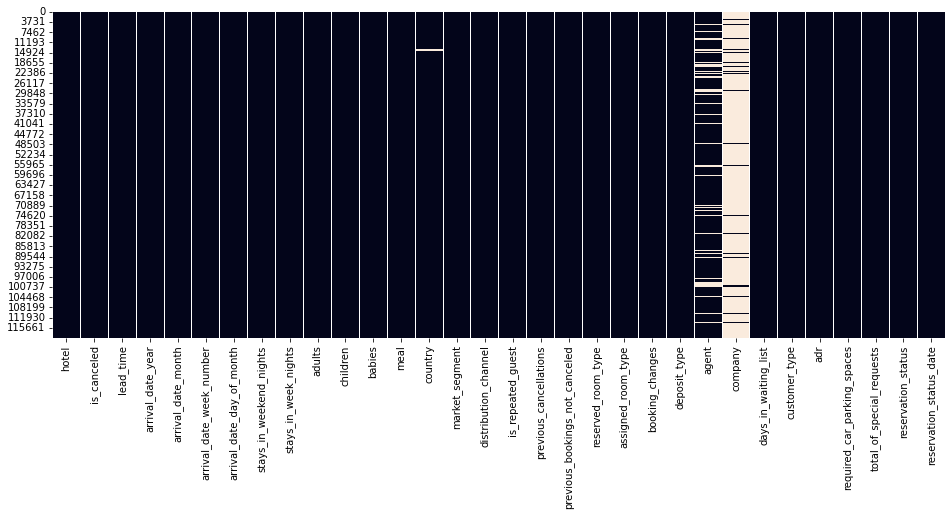

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull(), cbar=False)



## **Dealing with null values**

## **Replacing the null values of columns 'agent', 'company', and 'children' with 0.0(float)**

In [ ]:
df[['agent','company','children']] = df[['agent','company','children']].fillna(0.0)

In [ ]:
df.loc[:,'company']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: company, Length: 119390, dtype: float64

In [ ]:
df2 = pd.DataFrame(df.loc[:,'company'])
print(df2)


        company
0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
...         ...
119385      0.0
119386      0.0
119387      0.0
119388      0.0
119389      0.0

[119390 rows x 1 columns]


In [ ]:
df2.head(20)

,company
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [ ]:
df2.tail()

,company
119385,0.0
119386,0.0
119387,0.0
119388,0.0
119389,0.0


In [ ]:
df.loc[:,'agent']

0           0.0
1           0.0
2           0.0
3         304.0
4         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 119390, dtype: float64

##**Replacing the null values of column 'country' with mode of the column 'country'.**

In [ ]:
df['country'].fillna(df['country'].mode()[0], inplace=True)
df.loc[:,'country']


0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

## **Checking again about the null values.**

Looking through the datasets to see that null values eliminated or not.

In [ ]:
df.isnull().sum().sort_values(ascending=False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

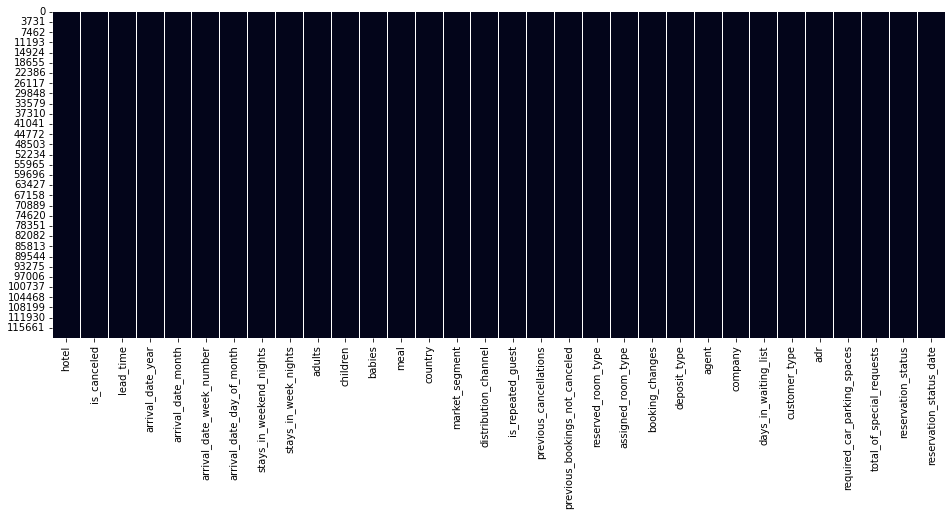

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull(), cbar=False)

## **In the histogram below we can have a brief picture of various column trend as below.**
### ***We can see that the maximum guest came in the year 2016** 
### ***Maximum arrival week number is 30.**
### ***Maximum arrival happens in the last of the month**
### ***Majority of the booking is cancelled** 












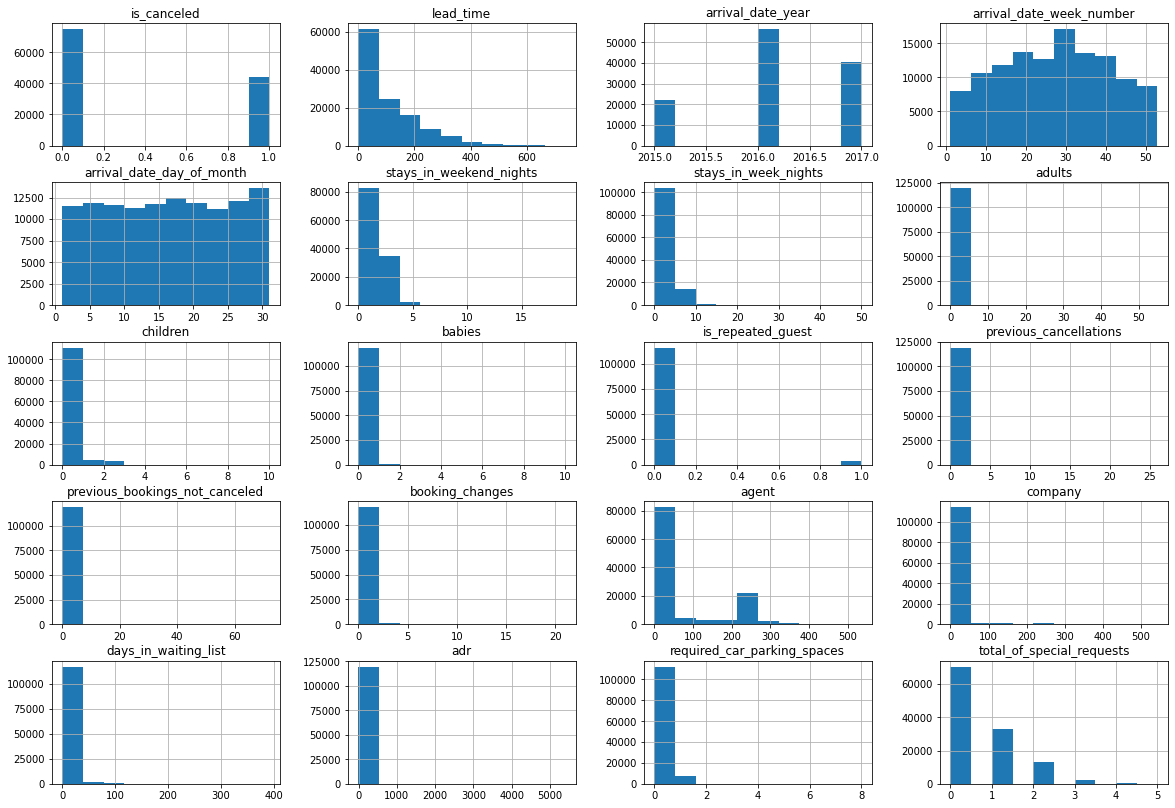

In [ ]:
df.hist(figsize=(20,14))
plt.show()

## **Looking for correlation**

In [ ]:
cor= df.corr()
cor

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005036,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.046529,-0.082995,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037613,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.012640,-0.086250,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054636,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.056463,0.033882,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005515,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.018244,-0.032750,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014553,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.000202,0.003724,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045794,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.161427,-0.079977,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.195135,-0.043641,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030440,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,0.024994,-0.166778,-0.008283,0.230641,0.014785,0.122884
children,0.005036,-0.037613,0.054636,0.005515,0.014553,0.045794,0.044203,0.030440,1.000000,0.024030,-0.032858,-0.024729,-0.021072,0.048952,0.050581,-0.042622,-0.033271,0.324853,0.056255,0.081736
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.030266,-0.009459,-0.010621,0.029186,0.037383,0.097889


## **Heatmap for correlation**

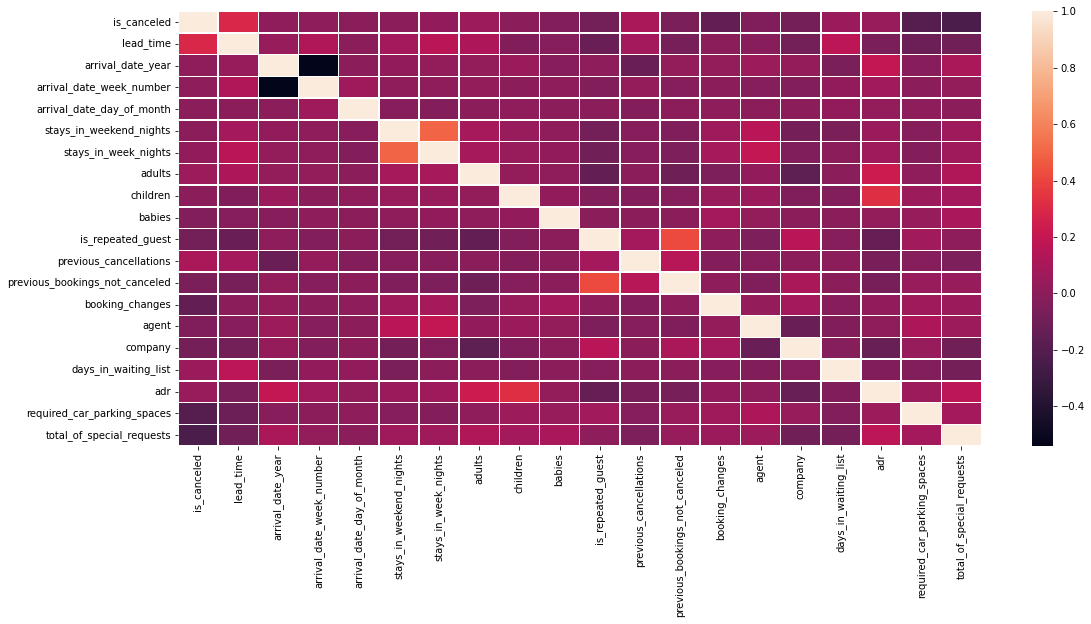

In [ ]:
plt.figure(figsize=(18,8))
sns.heatmap(cor, linewidths = 0.5)

## **Inference**

### **There is no correlation between the variables except diagonal element. So we can deduce that variables are independent.**

## **From which countries the hotel company are having frequent visitors?**

In [ ]:
visitorFromCountry = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
visitorFromCountry.columns = ['country', 'No of guests']
print(visitorFromCountry)


    country  No of guests
0       PRT         21492
1       GBR          9676
2       FRA          8481
3       ESP          6391
4       DEU          6069
..      ...           ...
160     BHR             1
161     DJI             1
162     MLI             1
163     NPL             1
164     FRO             1

[165 rows x 2 columns]


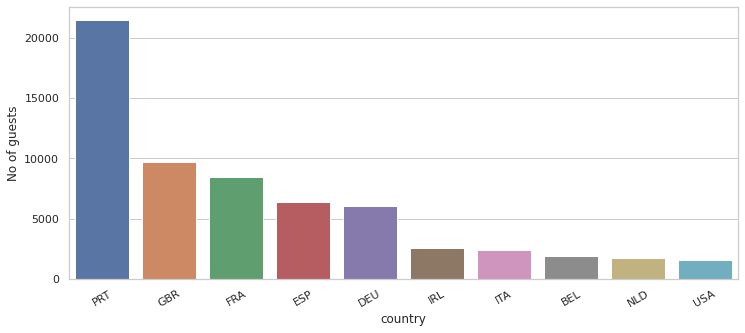

In [ ]:
a = visitorFromCountry.head(10)
plt.figure(figsize=(12,5))
sns.set_theme(style = "whitegrid")
tips =sns.load_dataset("tips")
ax = sns.barplot(x = "country",y = "No of guests",data = a)
p = plt.xticks(rotation=30)

## **Inference**

### **Portugal is the country from where maximum visitors came followed by Great Britiain, France and Spain**.
### **We have taken only the booking which has been completed**.



## **Are hotels able to retain its customer?**

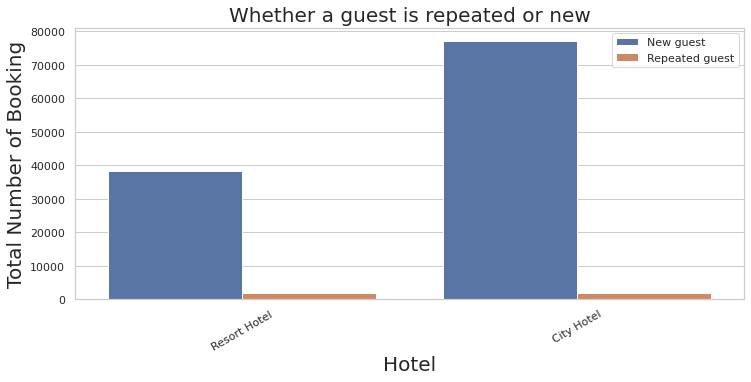

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='hotel', hue='is_repeated_guest', data=df)
plt.legend(['New guest', 'Repeated guest'])
plt.title("Whether a guest is repeated or new",fontsize = 20)
plt.ylabel("Total Number of Booking",fontsize = 20)
plt.xlabel("Hotel",fontsize = 20)
p = plt.xticks(rotation=30)

## **Inference**
### **We can see that there is very low  number of repeated guest in both the hotel. A lot of attention should be drawn to solve this problem because repeated guest know the services of hotel very well.** 

## **What are the booking by different market type?**

Text(0.5, 1.0, 'Different Market Type')

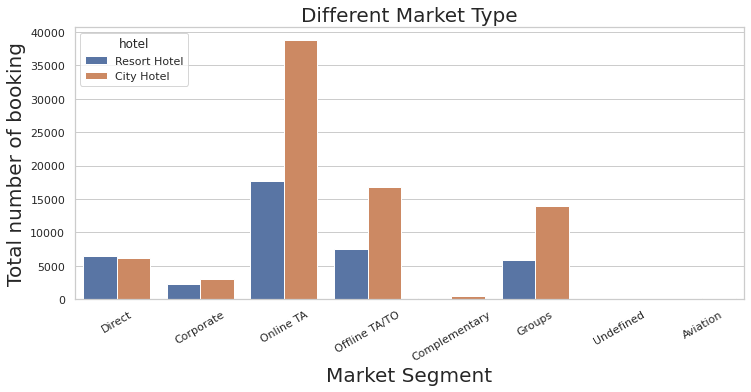

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='market_segment', hue='hotel', data=df)
plt.ylabel("Total number of booking",fontsize = 20)
plt.xlabel("Market Segment",fontsize = 20)
p = plt.xticks(rotation=30)
plt.title("Different Market Type",fontsize = 20)

## **Inference**
### **Clearly, We can see that Online TA has the maximum booking followed by offline TA/TO in maximum booking and Aviation has the least booking.**

## **What are the different channel that are contributing to bookings ?**

Text(0.5, 1.0, 'Different distribution channel')

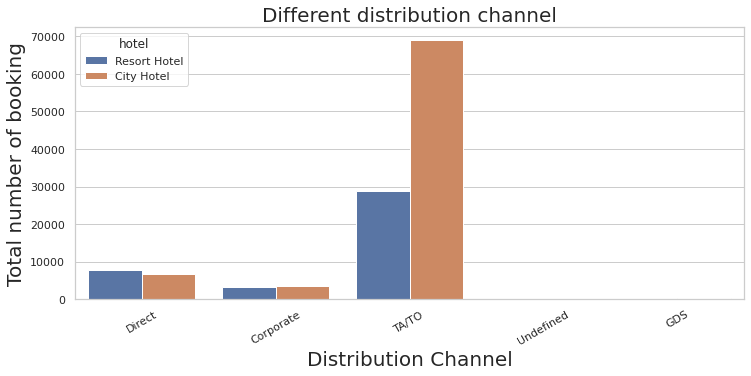

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='distribution_channel', hue='hotel', data=df)
plt.ylabel("Total number of booking",fontsize = 20)
plt.xlabel("Distribution Channel",fontsize = 20)
p = plt.xticks(rotation=30)
plt.title("Different distribution channel",fontsize = 20)

## **Inference**
### **TA/TO of the hotels have maximum contribution to the booking followed by Direct. Both the hotels need to expand their  distribution channel which in results will expand their businesses.**

##**What are the average daily rate of both the hotel over a given period of months?**

Text(0.5, 1.0, 'Average Daily rate by months')

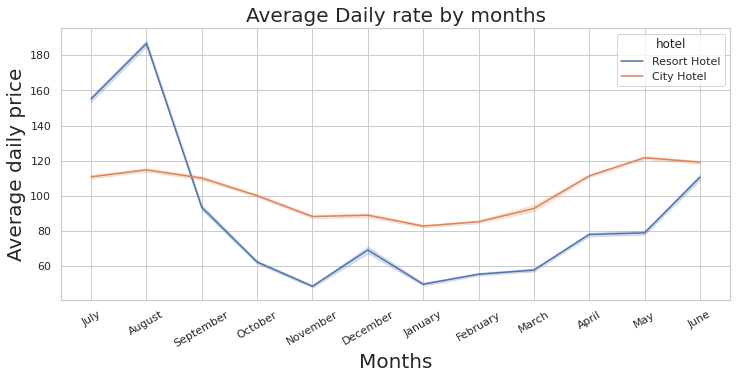

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data=df)
plt.ylabel("Average daily price",fontsize = 20)
plt.xlabel("Months",fontsize = 20)
p = plt.xticks(rotation=30)
plt.title("Average Daily rate by months",fontsize = 20)

## **Inference**
### **By looking closely at the line chart,we can say that for Resort hotel the highest average daily rates is in the month of July and City hotel the highest average daily rates is in the month of May. For Resort hotel the least average daily rate is in month of November and for City hotel it is in month of January.**

### **We can also say that average price(adr) of city hotel is somewhere between 85 to 125 and for Resort hotel the average price(adr) is between 55 to 185 thus we can say that the average price of hotel Resort is volatile**.

### **The graph depicts that for the month of July to mid August stay at Hotel Resort is costlier and from month of September to June stay at Hotel city is costlier.** 

## **What are the numbers of advanced day for booking of both the hotel?**

Text(0.5, 1.0, 'Days in advanced for booking the hotel')

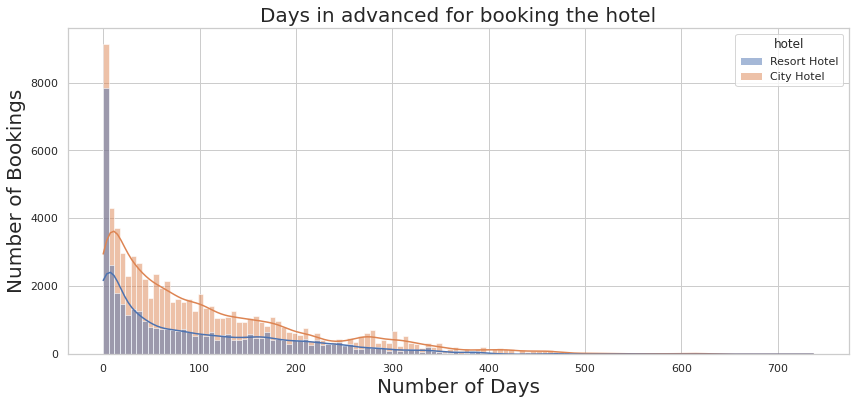

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(x='lead_time', hue='hotel', data=df, kde=True)
plt.xlabel("Number of Days",fontsize = 20)
plt.ylabel("Number of Bookings",fontsize = 20)
plt.title("Days in advanced for booking the hotel",fontsize = 20)

## **Inference**
### **From the histrogram we can say that most of the booking of both the hotels are done within 100 days of check-in date to hotel and for the hotel Resort maximun booking are done on the same check-in day.**

